# Titanic Classification

*Name*: **Radhika Garg**



## Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, precision_recall_curve, recall_score, precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import ShuffleSplit, KFold
from sklearn.model_selection import GridSearchCV

In [4]:
import graphviz
from IPython.display import Image

## Import Data

In [5]:
df = sns.load_dataset('titanic')

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Data Preprocessing

In [8]:
df.drop(['embarked', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'], axis=1, inplace=True)

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class
0,0,3,male,22.0,1,0,7.2500,Third
1,1,1,female,38.0,1,0,71.2833,First
2,1,3,female,26.0,0,0,7.9250,Third
3,1,1,female,35.0,1,0,53.1000,First
4,0,3,male,35.0,0,0,8.0500,Third


In [10]:
df['sex'] = df['sex'] == 'male'
df['sex'] = df.sex.astype(int)

## EDA

In [11]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


<ipython-input-12-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

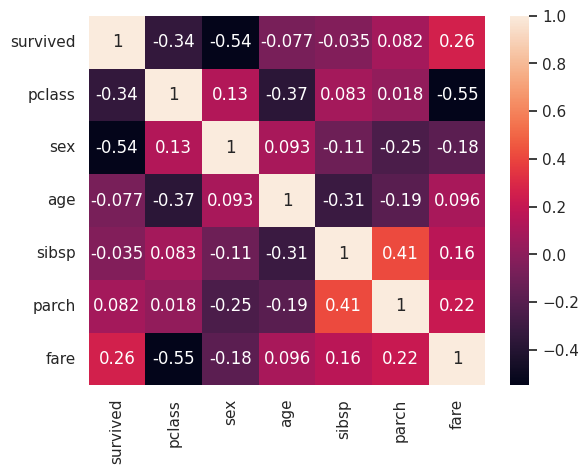

In [12]:
sns.heatmap(df.corr(), annot=True)

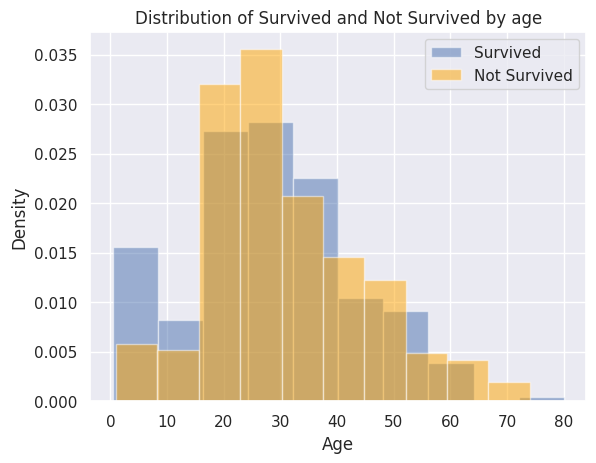

In [13]:
plt.hist(df[df['survived'] == 1].age, alpha=0.5, density=True, label='Survived')
plt.hist(df[df['survived'] == 0].age, alpha=0.5, color='orange', density=True, label='Not Survived')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Survived and Not Survived by age')
plt.show()

<Axes: xlabel='class', ylabel='count'>

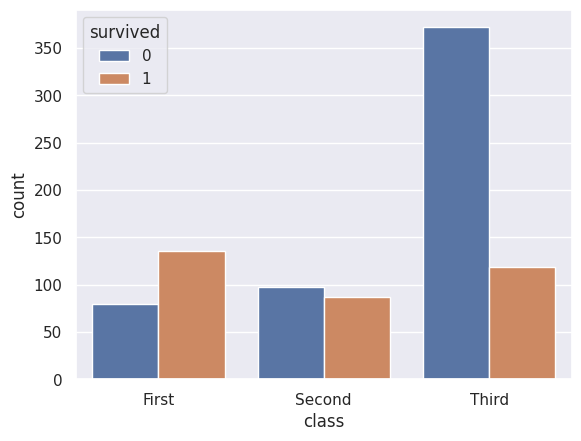

In [14]:
sns.countplot(data=df, x='class', hue='survived')

<Axes: xlabel='age', ylabel='class'>

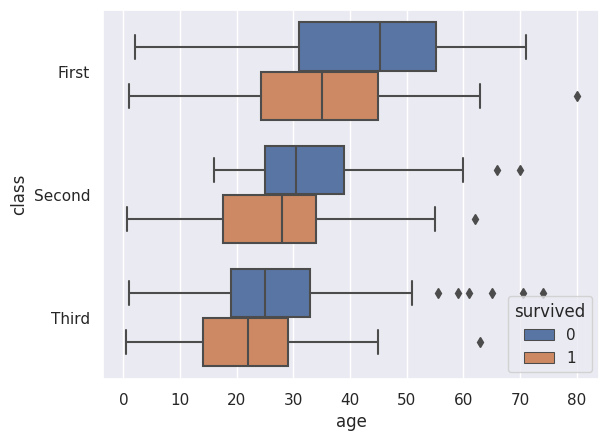

In [15]:
sns.boxplot(data=df, x='age', y='class', hue='survived')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    int64   
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   class     891 non-null    category
dtypes: category(1), float64(2), int64(5)
memory usage: 49.9 KB


Let's Impute the values of Age by pclass, survived or not

In [17]:
impute_val = df.groupby(['pclass', 'survived'])['age'].mean()
impute_val

pclass  survived
1       0           43.695312
        1           35.368197
2       0           33.544444
        1           25.901566
3       0           26.555556
        1           20.646118
Name: age, dtype: float64

In [18]:
for idx, row in df.iterrows():
    if pd.isnull(row['age']):
        df.at[idx, 'age'] = impute_val[row['pclass']][row['survived']]

Removing Outliers

In [19]:
q1, q3 = df.fare.quantile(0.25), df.fare.quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + iqr * 1.5
upper_bound

65.6344

In [20]:
df = df[df['fare'] < 100]

In [21]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare
count,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,0.361575,2.391408,0.665871,29.142108,0.514320,0.349642,22.411942
std,0.480744,0.792451,0.471967,13.254825,1.117541,0.784067,20.827218
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,1.000000,26.555556,0.000000,0.000000,13.000000
75%,1.000000,3.000000,1.000000,35.842049,1.000000,0.000000,27.720800
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,93.500000


## Splitting Data

In [22]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class'], dtype='object')

In [23]:
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = df['survived']

In [24]:
y.value_counts()

0    535
1    303
Name: survived, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [26]:
X_train.shape

(670, 6)

In [27]:
# scaler = MinMaxScaler()
# X_train_tr = scaler.fit_transform(X_train)
# X_test_tr= scaler.transform(X_test)

## Model

### Logistic Regression

In [28]:
sensitivity_score = recall_score
def specificity_score(y_true, y_pred):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
    return r[0]

In [29]:
def report(y_true, y_predicted):
    cm = confusion_matrix(y_true, y_predicted)
    ss = sensitivity_score(y_true, y_predicted)
    sp = specificity_score(y_true, y_predicted)

    print(f"Confusion Matrix: \n{pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])} \nSensitivity: {ss} \nSpecificity: {sp} \n-------------------")
    print(classification_report(y_true, y_predicted))

In [30]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_train_pred = log_reg.predict(X_train)

In [32]:
print(f"Intercept: {log_reg.intercept_}\nWeights: {log_reg.coef_}")

Intercept: [4.52035298]
Weights: [[-0.95864534 -2.431188   -0.0525393  -0.53006696 -0.08693517  0.02162956]]


In [33]:
y_test_pred = log_reg.predict(X_test)

In [34]:
report(y_test, y_test_pred)

Confusion Matrix: 
          Predicted 0  Predicted 1
Actual 0           99            8
Actual 1           14           47 
Sensitivity: 0.7704918032786885 
Specificity: 0.9252336448598131 
-------------------
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       107
           1       0.85      0.77      0.81        61

    accuracy                           0.87       168
   macro avg       0.87      0.85      0.86       168
weighted avg       0.87      0.87      0.87       168



#### ROC Curve

In [35]:
y_test_proba = log_reg.predict_proba(X_test)

In [36]:
fpr, tpr, threshold = roc_curve(y_test, y_test_proba[:, 1])

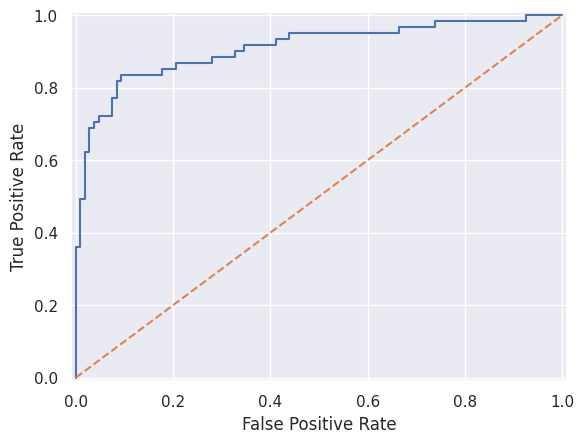

In [37]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [38]:
print(f"Logistic Regression AUC Score: {roc_auc_score(y_test, y_test_proba[:, 1])}")

Logistic Regression AUC Score: 0.9097594607017006


#### K-Fold Cross Validation

In [39]:
scores = cross_validate(log_reg, X_train, y_train,
                       cv=5, scoring=['f1', 'precision', 'recall'],
                       return_estimator=True)

In [40]:
scores

{'fit_time': array([0.02205706, 0.02237058, 0.04597068, 0.02730966, 0.02522826]),
 'score_time': array([0.00881481, 0.0090282 , 0.02401423, 0.01052928, 0.0098505 ]),
 'estimator': [LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression()],
 'test_f1': array([0.72916667, 0.73563218, 0.69565217, 0.6744186 , 0.66666667]),
 'test_precision': array([0.74468085, 0.84210526, 0.72727273, 0.76315789, 0.62962963]),
 'test_recall': array([0.71428571, 0.65306122, 0.66666667, 0.60416667, 0.70833333])}

In [41]:
print(f"f1        -> avg: {scores['test_f1'].mean():.3f}, std: {scores['test_f1'].std():.4f}")
print(f"precision -> avg: {scores['test_precision'].mean():.3f}, std: {scores['test_precision'].std():.4f}")
print(f"recall    -> avg: {scores['test_recall'].mean():.3f}, std: {scores['test_recall'].std():.4f}")

f1        -> avg: 0.700, std: 0.0279
precision -> avg: 0.741, std: 0.0683
recall    -> avg: 0.669, std: 0.0402


### SGDClassifier

In [42]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

SGDClassifier()

In [43]:
print(f"Intercept: {sgd_clf.intercept_}\nWeights: {sgd_clf.coef_}")

Intercept: [311.76827737]
Weights: [[ -23.82460267 -316.05295696   -7.33571276 -138.12238005  -39.20504237
    22.95096354]]


In [44]:
y_test_pred = sgd_clf.predict(X_test)
report(y_test, y_test_pred)

Confusion Matrix: 
          Predicted 0  Predicted 1
Actual 0           60           47
Actual 1            7           54 
Sensitivity: 0.8852459016393442 
Specificity: 0.5607476635514018 
-------------------
              precision    recall  f1-score   support

           0       0.90      0.56      0.69       107
           1       0.53      0.89      0.67        61

    accuracy                           0.68       168
   macro avg       0.72      0.72      0.68       168
weighted avg       0.76      0.68      0.68       168



#### Hyper Parameter Tuning for SGDClassifier

In [45]:
sgd = SGDClassifier(random_state=42,
                    max_iter=2000,
                    n_iter_no_change=5,
                    warm_start=True, )

In [46]:
param_grid = {
    'loss': ['log_loss', 'hinge', 'modified_huber'],
    'learning_rate': ['constant', 'adaptive'],
    'penalty': ['l2', 'l1'],
    'alpha': [1, 1e-1, 1e-2, 1e-3],
    'eta0': [1e-1, 1e-2, 1e-2]
}

In [47]:
sgd_gscv = GridSearchCV(estimator=sgd,
                        param_grid=param_grid,
                        cv=5,
                        scoring=['accuracy', 'f1'],
                        refit='accuracy',
                        return_train_score=True,)

In [48]:
sgd_gscv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=SGDClassifier(max_iter=2000, random_state=42,
                                     warm_start=True),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001],
                         'eta0': [0.1, 0.01, 0.01],
                         'learning_rate': ['constant', 'adaptive'],
                         'loss': ['log_loss', 'hinge', 'modified_huber'],
                         'penalty': ['l2', 'l1']},
             refit='accuracy', return_train_score=True,
             scoring=['accuracy', 'f1'])

In [49]:
print(f"Best Parameter: {sgd_gscv.best_params_}")
print(f"Best F1 score: {sgd_gscv.best_score_}")

Best Parameter: {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'l2'}
Best F1 score: 0.7865671641791044


In [50]:
best_idx = sgd_gscv.best_index_
print(f"Best Accuracy score on training set: {sgd_gscv.cv_results_['mean_train_accuracy'][best_idx]}")
print(f"Best f1 score on training set: {sgd_gscv.cv_results_['mean_train_f1'][best_idx]}")
print()
print(f"Best Accuracy score on test set: {sgd_gscv.cv_results_['mean_test_accuracy'][best_idx]}")
print(f"Best f1 score on test set: {sgd_gscv.cv_results_['mean_test_f1'][best_idx]}")

Best Accuracy score on training set: 0.7917910447761194
Best f1 score on training set: 0.6958024577546575

Best Accuracy score on test set: 0.7865671641791044
Best f1 score on test set: 0.6919757127413941


In [51]:
sgd_clf = sgd_gscv.best_estimator_

In [52]:
y_test_pred = sgd_clf.predict(X_test)
report(y_test, y_test_pred)

Confusion Matrix: 
          Predicted 0  Predicted 1
Actual 0           96           11
Actual 1           15           46 
Sensitivity: 0.7540983606557377 
Specificity: 0.897196261682243 
-------------------
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       107
           1       0.81      0.75      0.78        61

    accuracy                           0.85       168
   macro avg       0.84      0.83      0.83       168
weighted avg       0.84      0.85      0.84       168



**We can clearly see that SGDClassifier has less score than the Logistic Regression**

### Support Vector Machine

In [53]:
svc = SVC(kernel='linear', C=1, probability=True)
svc.fit(X_train, y_train)

SVC(C=1, kernel='linear', probability=True)

In [54]:
print(f"Intercept: {svc.intercept_}\nWeights: {svc.coef_}")

Intercept: [1.43007132]
Weights: [[-0.09837134 -2.02002543 -0.00876558 -0.27616078 -0.0700877   0.00643468]]


In [55]:
y_train_pred = svc.predict(X_train)
report(y_train, y_train_pred)

Confusion Matrix: 
          Predicted 0  Predicted 1
Actual 0          365           63
Actual 1           86          156 
Sensitivity: 0.6446280991735537 
Specificity: 0.852803738317757 
-------------------
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       428
           1       0.71      0.64      0.68       242

    accuracy                           0.78       670
   macro avg       0.76      0.75      0.75       670
weighted avg       0.77      0.78      0.77       670



In [56]:
y_test_pred = svc.predict(X_test)
report(y_test, y_test_pred)

Confusion Matrix: 
          Predicted 0  Predicted 1
Actual 0           96           11
Actual 1           17           44 
Sensitivity: 0.7213114754098361 
Specificity: 0.897196261682243 
-------------------
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       107
           1       0.80      0.72      0.76        61

    accuracy                           0.83       168
   macro avg       0.82      0.81      0.82       168
weighted avg       0.83      0.83      0.83       168



**Linear Support Vector Machine as well have low score than Logistic Regression**

In [57]:
log_y_test_proba = log_reg.predict_proba(X_test)
log_fpr, log_tpr, log_threshold = roc_curve(y_test, log_y_test_proba[:, 1])

sgd_y_test_proba = sgd_clf.predict_proba(X_test)
sgd_fpr, sgd_tpr, sgd_threshold = roc_curve(y_test, sgd_y_test_proba[:, 1])

svc_y_test_proba = svc.predict_proba(X_test)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_y_test_proba[:, 1])

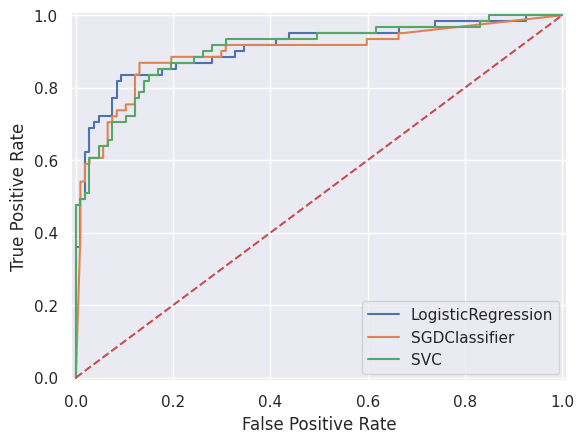

In [58]:
plt.plot(log_fpr, log_tpr, label='LogisticRegression')
plt.plot(sgd_fpr, sgd_tpr, label='SGDClassifier')
plt.plot(svc_fpr, svc_tpr, label='SVC')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [59]:
print(f"Logistic Regression AUC Score: {roc_auc_score(y_test, log_y_test_proba[:, 1])}")
print(f"SGDClassifier AUC Score: {roc_auc_score(y_test, sgd_y_test_proba[:, 1])}")
print(f"Linear SVC AUC Score: {roc_auc_score(y_test, svc_y_test_proba[:, 1])}")

Logistic Regression AUC Score: 0.9097594607017006
SGDClassifier AUC Score: 0.8957407691129158
Linear SVC AUC Score: 0.903937490424391


### Decision Trees

In [60]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
y_test_pred = tree.predict(X_test)
report(y_test, y_test_pred)

Confusion Matrix: 
          Predicted 0  Predicted 1
Actual 0           92           15
Actual 1           17           44 
Sensitivity: 0.7213114754098361 
Specificity: 0.8598130841121495 
-------------------
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.75      0.72      0.73        61

    accuracy                           0.81       168
   macro avg       0.79      0.79      0.79       168
weighted avg       0.81      0.81      0.81       168



**The Logistic Regression model performs better, though we may still want to use a Decision Tree for its interpretability.**

In [62]:
kf = KFold(n_splits=5, shuffle=True)
for criterion in ['gini', 'entropy']:
    print("Decision Tree - {}".format(criterion))
    accuracy = []
    precision = []
    recall = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        dt = DecisionTreeClassifier(criterion=criterion)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
    print("accuracy:", np.mean(accuracy))
    print("precision:", np.mean(precision))
    print("recall:", np.mean(recall), '\n')
    print()

Decision Tree - gini
accuracy: 0.8067222697462219
precision: 0.7459970595442293
recall: 0.7105886026541764 


Decision Tree - entropy
accuracy: 0.8031365839749075
precision: 0.7253394045209847
recall: 0.7514523520661529 




In [63]:
feat_names = list(X.columns)

In [64]:
feat_names

['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']

In [65]:
tree_file = export_graphviz(tree, feature_names=feat_names)

In [66]:
graph = graphviz.Source(tree_file)
graph.render(filename='tree', format='png', cleanup=True)

'tree.png'

**We can see that perfectly trained on training set. This is probably too fine-grained and is giving single datapoints from our dataset too much power. We can see that the leaf nodes all have few datapoints and at sometime only one.**


Our tree create a tree that's overfit and doesn't capture the essence of the data.

To Solve these issues, we use technique called **Pruning the Tree**. That is making tree smaller with goal of reducing overfitting.

In [67]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, max_leaf_nodes=20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, min_samples_leaf=3)

In [68]:
y_train_pred = dt.predict(X_train)
report(y_train, y_train_pred)

Confusion Matrix: 
          Predicted 0  Predicted 1
Actual 0          405           25
Actual 1           61          180 
Sensitivity: 0.7468879668049793 
Specificity: 0.9418604651162791 
-------------------
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       430
           1       0.88      0.75      0.81       241

    accuracy                           0.87       671
   macro avg       0.87      0.84      0.86       671
weighted avg       0.87      0.87      0.87       671



In [69]:
y_test_pred = dt.predict(X_test)
report(y_test, y_test_pred)

Confusion Matrix: 
          Predicted 0  Predicted 1
Actual 0           96            9
Actual 1           15           47 
Sensitivity: 0.7580645161290323 
Specificity: 0.9142857142857143 
-------------------
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       105
           1       0.84      0.76      0.80        62

    accuracy                           0.86       167
   macro avg       0.85      0.84      0.84       167
weighted avg       0.86      0.86      0.85       167



**Let's Tune the Hyper-parameters**

In [70]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3],
    'max_leaf_nodes': [10, 20, 35, 50]}

In [71]:
dt = DecisionTreeClassifier()
gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)

In [72]:
gs.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'max_leaf_nodes': [10, 20, 35, 50],
                         'min_samples_leaf': [1, 2, 3]},
             scoring='f1')

In [73]:
print(f"Best Parameter: {gs.best_params_}")
print(f"Best F1 score: {gs.best_score_}")

Best Parameter: {'max_depth': 15, 'max_leaf_nodes': 50, 'min_samples_leaf': 1}
Best F1 score: 0.7771660921786026


### RandomForestTrees

In [74]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
y_train_pred = rfc.predict(X_train)
report(y_train, y_train_pred)

Confusion Matrix: 
          Predicted 0  Predicted 1
Actual 0          430            0
Actual 1            6          235 
Sensitivity: 0.975103734439834 
Specificity: 1.0 
-------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       430
           1       1.00      0.98      0.99       241

    accuracy                           0.99       671
   macro avg       0.99      0.99      0.99       671
weighted avg       0.99      0.99      0.99       671



In [76]:
rfc.score(X_test, y_test)

0.8383233532934131

#### Tuning A Random Forest

In [77]:
param_grid = {
    'n_estimators': [10, 25, 50, 75, 100],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3],
}

In [78]:
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, scoring='f1', cv=5)

In [79]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [10, 25, 50, 75, 100]},
             scoring='f1')

In [80]:
print(f"Best Parameter: {gs.best_params_}")
print(f"Best F1 score: {gs.best_score_}")

Best Parameter: {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 50}
Best F1 score: 0.7590830153020101


With a parameter like the number of trees in a random forest, increasing the number of trees will never hurt performance. Increasing the number trees will increase performance until a point where it levels out. The more trees, however, the more complicated the algorithm. A more complicated algorithm is more resource intensive to use. Generally it is worth adding complexity to the model if it improves performance but we do not want to unnecessarily add complexity.

We can use what is called an **Elbow Graph** to find the sweet spot. Elbow Graph is a model that optimizes performance without adding unnecessary complexity.

In [81]:
n_estimators = list(range(1, 51))
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [82]:
scores = gs.cv_results_['mean_test_score']

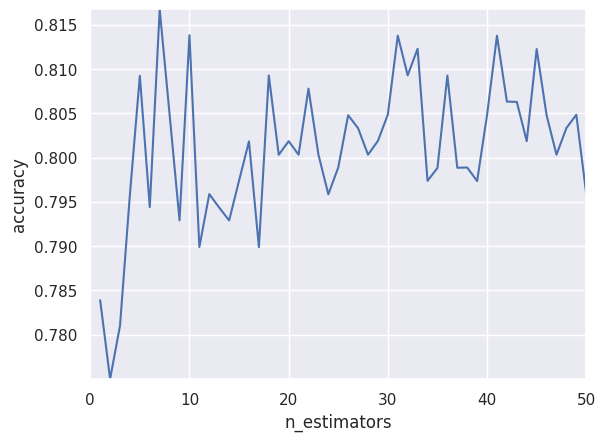

In [83]:
plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(0, 50)
plt.ylim(scores.min(), scores.max())
plt.show()

In [84]:
scores.argmax()

6

If we look at this graph, we see that around 30 trees the graph levels out.

We should choose about 30 to be our number of estimators, because we want the minimum number of estimators that still yield maximum performance.

In [85]:
rf = RandomForestClassifier(n_estimators=26)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=26)

In [86]:
rf.score(X_test, y_test)

0.8502994011976048

#### Feature Importances

In [87]:
imp_feats = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
imp_feats

age       0.326590
fare      0.265775
sex       0.226328
pclass    0.086967
sibsp     0.058221
parch     0.036118
dtype: float64

Feature Selection enables us to train a model faster, it reduces the complexity of a model thus makes it easier to interpret. And if the right subset is chosen, it can improve the accuracy of a model.

At Last we can see that LogisitcRegression and RandomForest with 30 estimators Gives a better result.

From Our Random Forest Model, we can see that features like Age, Sex, Fare (Socio-economic class) are more deciding factor for survival in titanic disaster.

## Thank You!!!